<a href="https://colab.research.google.com/github/sjoseph25/data_2000/blob/main/DATA2000final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA-2000 Final Exam

## Grading Rubric

This final will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided into 4 sections:

  - Model Building: 25 points
    - 15 points will be awarded for the actual model building (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 25 points
    - 5 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 10 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not

## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1Aoh7LvTKTEZO74eOsNhLzorkLtljkuchpg3ScNM_VEs/edit#heading=h.r0b18a8gh450).

-----

# Image Classification: Horse or Human


For this exercise, we are going to use a dataset of images of both horses and humans, taken from [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/horses_or_humans).

Our dataset contains 1,027 training images (300x300 pixels in full color) and 256 testing images, as well as a category label for each image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

## Importing the Data

First, let's download our dataset and take a look at what it contains:

In [2]:
X_train, y_train = tfds.load(
    'horses_or_humans',
    split='train',
    shuffle_files=True,
    as_supervised=True,
    batch_size=-1)
X_test, y_test = tfds.load(
    'horses_or_humans',
    split='test',
    shuffle_files=True,
    as_supervised=True,
    batch_size=-1)

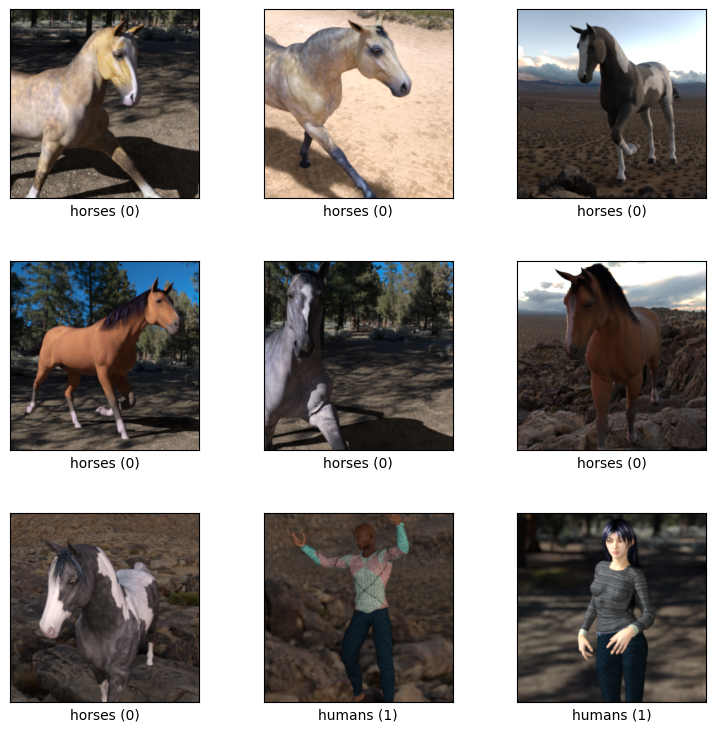

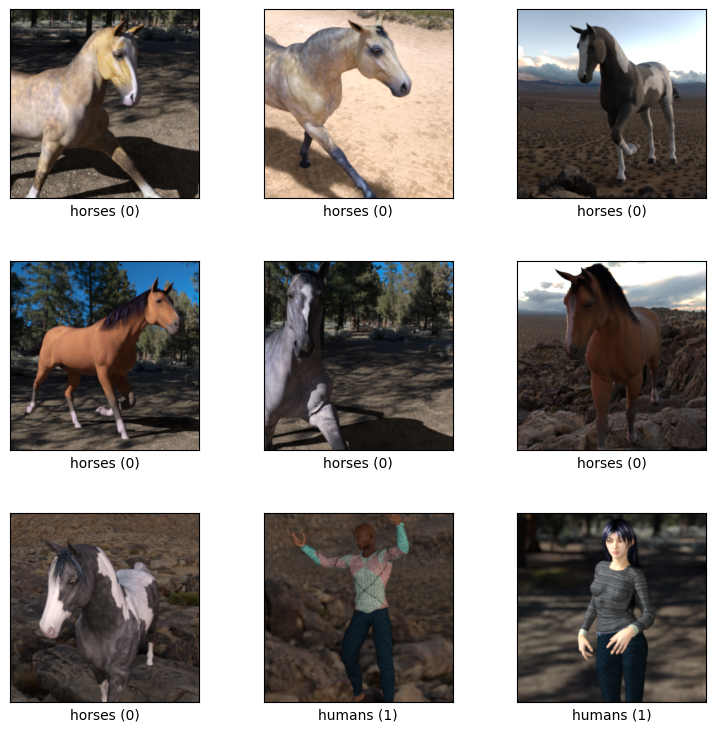

In [3]:
viz_data, ds_info = tfds.load(
    'horses_or_humans',
    split='train[:10]',
    shuffle_files=True,
    with_info=True)
tfds.visualization.show_examples(viz_data, ds_info)

## Extra Credit

For 3 points of extra credit, use TensorFlow's Keras preprocessing layers to create **synthetic training data**. To do this, you can, for example:
  - Create new records that rotate the original images a random number of degrees;
  - Create new records that mirror the original images left-to-right or top-to-bottom;
  - Create new records that partially crop the original images;
  - Create records that introduce noise to the original images;
  - etc.

  For more detail on how to do this, refer to the [Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) TensorFlow tutorial, and take a look at the [Image Super-Resolution](#scrollTo=aNGRuJahuk26) section of the final below.

## Model Building

Build a Convolutional Neural Network to classify each image as either a horse or a human.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [5]:
img_input = layers.Input(shape=(300, 300, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [6]:
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496 

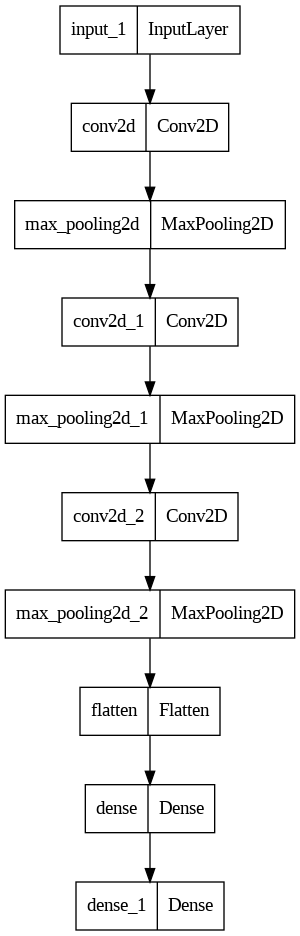

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['acc']
)

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test))

Epoch 1/10
33/33 [==============================] - 9s 66ms/step - loss: 104.4227 - acc: 0.8062 - val_loss: 5.1415 - val_acc: 0.8477
Epoch 2/10
33/33 [==============================] - 2s 51ms/step - loss: 1.0082 - acc: 0.9416 - val_loss: 3.8715 - val_acc: 0.8242
Epoch 3/10
33/33 [==============================] - 2s 49ms/step - loss: 0.0380 - acc: 0.9903 - val_loss: 5.5192 - val_acc: 0.8125
Epoch 4/10
33/33 [==============================] - 2s 49ms/step - loss: 3.9684e-04 - acc: 1.0000 - val_loss: 4.7830 - val_acc: 0.8477
Epoch 5/10
33/33 [==============================] - 2s 49ms/step - loss: 4.5293e-05 - acc: 1.0000 - val_loss: 4.6441 - val_acc: 0.8555
Epoch 6/10
33/33 [==============================] - 2s 47ms/step - loss: 1.4181e-05 - acc: 1.0000 - val_loss: 5.3071 - val_acc: 0.8555
Epoch 7/10
33/33 [==============================] - 2s 49ms/step - loss: 3.0811e-06 - acc: 1.0000 - val_loss: 4.6986 - val_acc: 0.8672
Epoch 8/10
33/33 [==============================] - 2s 47ms/step 

### **Narration**

I left the images at their original 300x300 pixel size and chose the parameter 3 to stay consistent with the three color channels. The first convolution extracts 16 filters that are 3x3 kernels, followed by a max-pooling layer with a 2x2 prominent feature window. The second layer extracts 32 filters that are 3x3 with a 2x2 window, and the third layer extracts 64 filters that are 3x3 with a 2x2 window. I left these the same as previous examples due to their being fairly standard parameters. Becuause the data are binary (horses at value 0 and humans at value 1 with no other values available), I used sigmoid activation so the network will also be binary and deduct the probability the current image is a human (value 1).

Then, I flattened the feature map to a 1 dimension tensor in order to add fully connected layers created with ReLU activation (negative values return as 0, positive values return as themselves). After that, I created an output layer with one node and sigmoid activation (again because of the binary nature of the data; values under 0 return as 0 and values over 1 return as 1). Finally, I created the model using the input feautre map and the output data that I formatted witht the input as well as the stacked convolution and maxpooling layers, the dense layer, and the sigmoid output layer.

I used model.compile to configure the specifications for model training, using binary_crossentropy loss due to the binary classification of the data and the rmsprop optimizer with learning rate 0.001 (this keeps me from having to monitor the learning rate myself).

I did no data preprocessing for this model or its training and evaluation, so stepped right into fitting the model on the x and y training data with 10 epochs and x and y testing data for validation.

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

Minimally, you should consider evaluating:
  - Your model's accuracy on the training and testing datasets;
  - Your model's loss over time as it trained;
  - A confusion matrix of your model's true and false positive and negative predictions; and
  - Holistically whether your model performs "well" enough for the classification task, and why or why not

Text(0.5, 1.0, 'Training and validation loss')

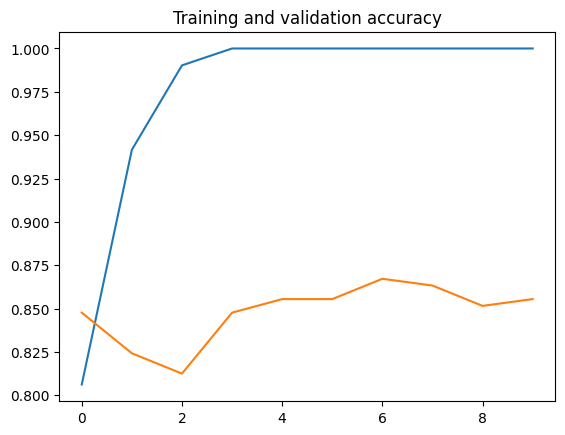

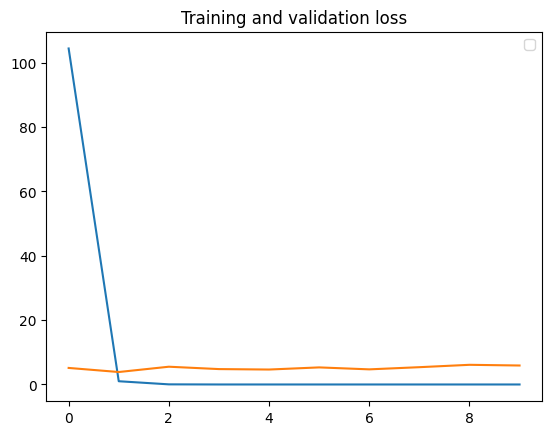

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [13]:
_eval_data_x = X_test[0:10]
_eval_data_y = y_test[0:10]

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

_preds = [np.argmax(_pred) for _pred in model.predict(_eval_data_x)]

1/1 [==============================] - 0s 408ms/step


In [24]:
print([elem for elem in zip(_preds, _eval_data_y)])

[(0, <tf.Tensor: shape=(), dtype=int64, numpy=0>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=0>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=0>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=1>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=1>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=0>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=0>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=1>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=0>), (0, <tf.Tensor: shape=(), dtype=int64, numpy=1>)]


### **Narration**

The model was extremely overfit, as shown by the graphs above where the training line (blue) remains near 100% for nearly all of the epochs (for 7/10 of them to be precise), yet the validation accuracy line (red) reaches its lowest point at epoch 2 (about 81%) and never goes above 87%. The validation accuracy ends at around 86%. The loss graph is a little bit confusing, as the gap between the two lines is small (indicating underfitting) but the training loss is larger than the validation loss (indicating the opposite). The small dataset is likely part of the reason the model is not very accurate, but adjusting some of the parameters may help make it more accurate (number of modules, window and maxpooling sizes, the epoch size, etc). Preprocessing the data may also make a difference.

-----

<a id="scrollTo=aNGRuJahuk26"></a>

# Image Super-Resolution

> **NOTE:** This section of the final is **optional**. If you choose to complete it, it will contribute to both the "Model Building" and "Model Evaluation" portions of the grading rubric in addition to the image classifier you have already built. This will mean that grading is more lenient; however, you will have to do additional work. There is no penalty for choosing to not complete this section.

For this task, you will build an autoencoder that takes an image and creates a super-resolution version of that image. I.e., it _upscales_ the image to fill in more detail than was originally present.

To build this model, we will use the same dataset as in the previous example; however, with a small twist. Your training data will be images of horses and humans that have been downsampled to 150x150 pixels, and your model output will be the **exact same** images, but at the original 300x300 pixel resolution. To help get started, I have prepared a training and testing dataset of these images for you:

In [25]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(150, 150),
  tf.keras.layers.Resizing(300, 300),
  tf.keras.layers.Rescaling(1./255)
])

X_train_2 = resize_and_rescale(X_train, training=True)
X_test_2 = resize_and_rescale(X_test, training=True)

As we can see, the image on the right is the one we have downscaled and it shows an obvious loss of detail compared to the original on the left. Let's see if our supersampling autoencoder is able to clear up the image resolution!

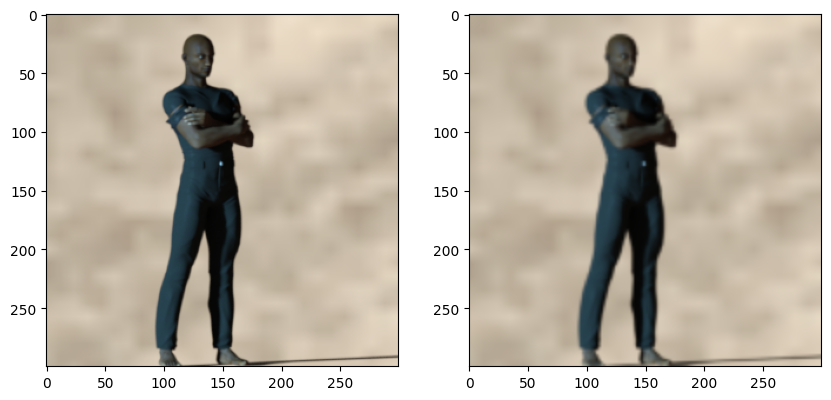

In [26]:
orig_img = next(iter(X_train))
downscaled_img = next(iter(X_train_2))

plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
plt.imshow(orig_img)

ax = plt.subplot(1, 2, 2)
plt.imshow(downscaled_img)

Finally, we will also create new y variables for our model to use as a ground truth against which to compare its predictions. These will just be the original 300x300 pixel images:

In [27]:
# Instead of "horse" or "human" labels,
# our y variable will now be the original
# 300x300 pixel images
y_train_2 = X_train
y_test_2 = X_test

You should reference our [Autoencoders Lab](https://github.com/wetherc/data-2000/blob/main/labs/11-16_autoencoders.ipynb) for guidance on how to structure your model. Importantly, remember:

  - Your model's input should have a shape that matches the input's pixel size (300x300 pixels --- remember, we downscaled the images and then stretched them back to their original dimensions);
  - Your model's output should have a shape that matches the output's pixel size (300x300 pixels);
  - Your convolutional and deconvolutional layers should be careful to evenly divide your images so that you don't have rounding issues from fractional pixels;
  - For your model's final layer, you should use TensorFlow's [UpSampling2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D) followed by one or more Convolutional2D layers

## Model Building

Build a Convolutional Neural Network to classify each image as either a horse or a human.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

Minimally, you should consider evaluating:
  - Your model's accuracy on the training and testing datasets;
  - Your model's loss over time as it trained;
  - A visual comparison of your upsampled predicted images and the original 300x300 pixel images;
  - Holistically whether your model performs "well" enough for the classification task, and why or why not